In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.utils.dataset_3d_helper import *
from files.pif.pif import *

# NOTE: Using more than 195 models, Voronoi tesselation does not work

In [2]:
ds, gt = create_paraboloide(num_points=1000, of=0.5)
plot3d(ds, gt)

In [3]:
from files.classes.base_models import *
PlaneEstimator()

In [4]:
from sklearn.ensemble import IsolationForest as iFor

ifor = iFor().fit(ds)
scores = -ifor.score_samples(ds)
ifor_auc, *_ = make_roc(gt, scores, show=False, to_plot=False);
print("iFor AUC: ", ifor_auc)

iFor AUC:  0.7759039999999999


In [5]:
params = {
    "mss": 3,
    "num_models": 200,
    "training_epochs": 300,
    "AE_structure": {
        "neurons": [3, 2, 3],
        "activation": lambda x: x
    }
}

pif = PreferenceIsolationForest(data=ds, model_name=PLANE)
scores = pif.anomaly_detection(params=params, in_th=0.1)

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 200/200: [==============================] (100%) ETA: 0:00:00.182097
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest


/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/files/classes/base_models.py:136: RuntimeWarning:

invalid value encountered in true_divide



ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
pif_auc, *_ = make_roc(gt, scores, show=False, to_plot=False);
print("PIF AUC: ", pif_auc) # PIF: 0.93

PIF AUC:  0.795572


In [ ]:
ae = NeuralNetwork(neurons=[3, 18, 6, 2, 6, 18, 3], activation=torch.tanh)
ae.fit(data=ds[:-1], epochs=300, print_training=True);

Epoch 300/300: [==============================] (100%) ETA: 0:00:00.068818 Mean Loss: 0.32166


In [ ]:
preds = ae.predict(ds[:-1])
plot3d(preds)
plot3d(ds[:500])

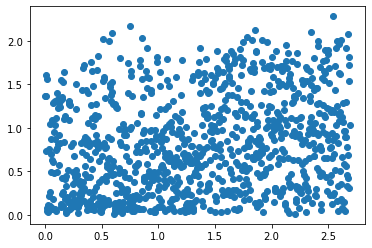

In [ ]:
plt.scatter(np.linspace(res.min(), res.max(), num=len(res)), ae.get_residuals(data=ds))